<a href="https://colab.research.google.com/github/reireu/for-copy/blob/main/%E6%BC%94%E7%BF%92%E3%83%BB%E4%BB%BB%E6%84%8F%E3%81%AE%E5%88%86%E9%A1%9E%E5%99%A8%E3%81%AE%E6%A7%8B%E6%88%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install japanize_matplotlib

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation, rc
from IPython.display import HTML
import plotly.graph_objs as go
import japanize_matplotlib
import numpy as np
import plotly.graph_objs as go

# 任意の分類器の構成

この資料では、2次元の入力に対して、
連続な境界を持つ任意の二値分類器を、
多層パーセプトロンを用いて構成します。

## Perceptronクラス

「パルス関数の構成.ipynb」では、以下のように、
Perceptronクラスを定義し、
パルス関数を出力するニューラルネットを構成しました。

```python
class Perceptron:
    def __init__(self, w, b, children=[], activate=step):
        self.weights = w
        self.bias = b
        self.children = children
        self.activate = activate
    def forward(self, x):
        if len(self.children) == 0:
            return self.activate(np.dot(self.weights, x) + self.bias)
        else:
            input_signals = np.array([p.forward(x) for p in self.children])
            return self.activate(np.dot(self.weights, input_signals) + self.bias)
```

Perceptronオブジェクトのインスタンス変数は以下のようになります。

| インスタンス変数 | 内容 |
| :--- | :--- |
| weights | 重みベクトル$w_1, \dots, w_d$をndarrayの形式として保持する。 |
| bias | バイアス$b$を保持する。 |
| activate | 活性化関数を関数オブジェクトとして保持する。デフォルトはstep関数。 |
| children | Perceptronオブジェクトの配列を保持する。デフォルトは空リスト`[]`。|

オブジェクトを生成するときは、以下の順に引数を指定します。

```python
Perceptron(重みベクトル, バイアス, 子パーセプトロンの配列, 活性化関数)
```

名前付き引数を使用しているので、次のような指定も可能です。

```python
Perceptron(重みベクトル, バイアス, children=子パーセプトロンの配列, activate=活性化関数)
```

階段関数・ロジスティック関数・恒等関数を活性化関数として定義します。

```python
def step(x):
    return (x > 0) * 1

def logistic(x):
    return 1/(1 + np.exp((-1) * x))

def identity(x):
    return x
```

まず、活性化関数とPerceptronクラスを定義して下さい。

In [19]:
class Perceptron:
    def __init__(self, w, b, children=[], activate=step):
        self.weights = w
        self.bias = b
        self.children = children
        self.activate = activate
    def forward(self, x):
        if len(self.children) == 0:
            return self.activate(np.dot(self.weights, x) + self.bias)
        else:
            input_signals = np.array([p.forward(x) for p in self.children])
            return self.activate(np.dot(self.weights, input_signals) + self.bias)

In [13]:
def step(x):
    return (x > 0) * 1

def logistic(x):
    return 1/(1 + np.exp((-1) * x))

def identity(x):
    return x

class Perceptron:
    def __init__(self, w, b, children=[], activate=step):
        self.weights = w
        self.bias = b
        self.children = children
        self.activate = activate
    def forward(self, x):
        if len(self.children) == 0:
            return self.activate(np.dot(self.weights, x) + self.bias)
        else:
            input_signals = np.array([p.forward(x) for p in self.children])
            return self.activate(np.dot(self.weights, input_signals) + self.bias)

## 1次元パルス関数の構成

区間$0 \le x < 0.1$で値1をとり、
その他では値0をとる**1変数**パルス関数を、
以下の構成により、ニューラルネットで実装できることを見ました。

> 活性化関数は階段関数とします。

```python
ax = plt.axes()
ax.axis("off")
p1 = patches.Circle(xy=(0, 0), radius=1, fc='w', ec='k', zorder=2)
p2 = patches.Circle(xy=(4, 0), radius=1, fc='w', ec='k', zorder=2)
p3 = patches.Circle(xy=(2, 4), radius=1, fc='w', ec='k', zorder=2)
ax.add_patch(p1)
ax.add_patch(p2)
ax.add_patch(p3)
ax.plot([2,0,2,4,2], [-3,0,4,0,-3], c='k', zorder=1)
ax.plot([2,2], [4,6], c='k', zorder=1)
ax.text(2, -3.5, r'$x$')
ax.text(-4, 0, r'$w=1, b=0$')
ax.text(5, 0, r'$w=1, b=-0.1$')
ax.text(3, 4, r'$w_1=1, w_2=-1, b=0$')
plt.axis('scaled')
ax.set_aspect('equal')
plt.show()
```

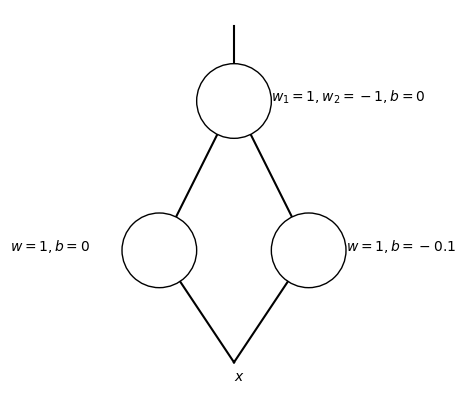

In [14]:
ax = plt.axes()
ax.axis("off")
p1 = patches.Circle(xy=(0, 0), radius=1, fc='w', ec='k', zorder=2)
p2 = patches.Circle(xy=(4, 0), radius=1, fc='w', ec='k', zorder=2)
p3 = patches.Circle(xy=(2, 4), radius=1, fc='w', ec='k', zorder=2)
ax.add_patch(p1)
ax.add_patch(p2)
ax.add_patch(p3)
ax.plot([2,0,2,4,2], [-3,0,4,0,-3], c='k', zorder=1)
ax.plot([2,2], [4,6], c='k', zorder=1)
ax.text(2, -3.5, r'$x$')
ax.text(-4, 0, r'$w=1, b=0$')
ax.text(5, 0, r'$w=1, b=-0.1$')
ax.text(3, 4, r'$w_1=1, w_2=-1, b=0$')
plt.axis('scaled')
ax.set_aspect('equal')
plt.show()

Pythonオブジェクトを用いて、
このニューラルネットをプログラミングすると以下のようになります。

```python
p1 = Perceptron(np.array([1]), 0)
p2 = Perceptron(np.array([1]), -0.1)
p = Perceptron(np.array([1, -1]), 0, children=[p1, p2])
```
実際、`p.forward(x)`の値をプロットして、パルス関数が得られることを確認して下さい。

```python
x = np.arange(-2, 2, 0.01)
y = [p.forward(t) for t in x]
plt.plot(x, y)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.text(-0.1, -0.15, '0', fontsize=15)
plt.text(0.9, -0.15, '1', fontsize=15)
plt.grid()
plt.show()
```

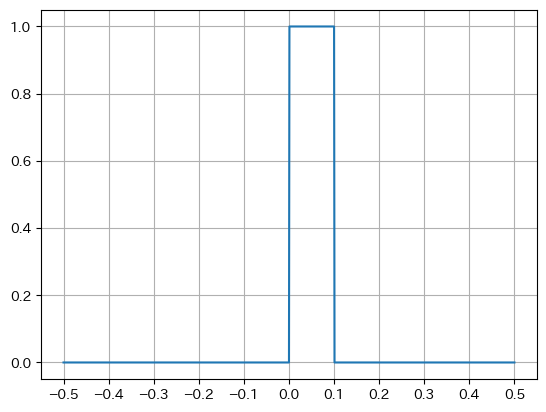

In [15]:
p1 = Perceptron(np.array([1]), 0)
p2 = Perceptron(np.array([1]), -0.1)
p = Perceptron(np.array([1, -1]), 0, children=[p1, p2])

x = np.linspace(-0.5, 0.5, 1001)
y = [p.forward(t) for t in x]
plt.plot(x, y)
plt.xticks(np.arange(-0.5,0.6,0.1))
plt.grid()
plt.show()

## 2次元パルス関数の構成
以下のプログラムで描画されるグラフを出力する2次元パルス関数を構成してみましょう。

$$
P_{0,0.1;0,0.1}(x, y) =
\begin{cases}
1 & \text{$0 < x \le 0.1$ 且つ $0 < y \le 0.1$} \\
0 & \text{その他の時}\\
\end{cases}
$$

```python
x, y = np.meshgrid(np.linspace(-0.5, 0.5, 101), np.linspace(-0.5, 0.5, 101))
z = ((x > 0)*1) * ((x < 0.1)*1) * ((y > 0)*1) * ((y < 0.1)*1)

trace = go.Surface(x=x, y=y, z=z)
fig = go.Figure(data=[trace])

fig.update_layout(
    width = 500,
    height = 500,
    scene = dict(
        xaxis=dict(title=r'$x_1$'),
        yaxis=dict(title=r'$x_2$'),
        zaxis=dict(title='出力')
    )
)
fig.show()
```

In [16]:
x, y = np.meshgrid(np.linspace(-0.5, 0.5, 101), np.linspace(-0.5, 0.5, 101))
z = ((x > 0)*1) * ((x < 0.1)*1) * ((y > 0)*1) * ((y < 0.1)*1)

trace = go.Surface(x=x, y=y, z=z)
fig = go.Figure(data=[trace])

fig.update_layout(
    width = 500,
    height = 500,
    scene = dict(
        xaxis=dict(title=r'$x_1$'),
        yaxis=dict(title=r'$x_2$'),
        zaxis=dict(title='出力')
    )
)
fig.show()

この2次元パルス関数は、以下の構成のニューラルネットで構成できます。

> ANDは入力$x_1, x_2$に対して論理積を出力するニューロン素子です。

```python
ax = plt.axes()
ax.axis("off")
w = 2

Px = patches.Rectangle(xy=(0, 0), width=w, height=w, fc='w', ec='k')
Py = patches.Rectangle(xy=(w+1, 0), width=w, height=w, fc='w', ec='k')

ax.add_patch(Px)
ax.text(w/2, -3, r'$x$')
ax.text(w/2-0.5, w/2, r'$P_{0, 0.1}$')
ax.plot([w/2, w/2], [-2,0], c='k')

ax.add_patch(Py)
ax.text(3*w/2+1, -3, r'$y$')
ax.text(3*w/2+0.5, w/2, r'$P_{0, 0.1}$')
ax.plot([3*w/2+1, 3*w/2+1], [-2,0], c='k')

out = patches.Circle(xy=(w+0.5, w+3), radius=1, fc='w', ec='k', zorder=2)
ax.add_patch(out)
ax.text(w, w+3, 'AND')
ax.plot([w/2, w+0.5], [w, w+3], c='k', zorder=1)
ax.plot([3*w/2+1, w+0.5], [w, w+3], c='k', zorder=1)
ax.plot([w+0.5, w+0.5], [w+4, w+6], c='k')
    
plt.axis('scaled')
ax.set_aspect('equal')
plt.show()
```

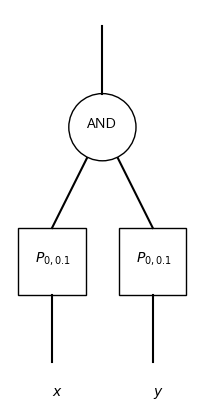

In [17]:
ax = plt.axes()
ax.axis("off")
w = 2

Px = patches.Rectangle(xy=(0, 0), width=w, height=w, fc='w', ec='k')
Py = patches.Rectangle(xy=(w+1, 0), width=w, height=w, fc='w', ec='k')

ax.add_patch(Px)
ax.text(w/2, -3, r'$x$')
ax.text(w/2-0.5, w/2, r'$P_{0, 0.1}$')
ax.plot([w/2, w/2], [-2,0], c='k')

ax.add_patch(Py)
ax.text(3*w/2+1, -3, r'$y$')
ax.text(3*w/2+0.5, w/2, r'$P_{0, 0.1}$')
ax.plot([3*w/2+1, 3*w/2+1], [-2,0], c='k')

out = patches.Circle(xy=(w+0.5, w+3), radius=1, fc='w', ec='k', zorder=2)
ax.add_patch(out)
ax.text(w, w+3, 'AND')
ax.plot([w/2, w+0.5], [w, w+3], c='k', zorder=1)
ax.plot([3*w/2+1, w+0.5], [w, w+3], c='k', zorder=1)
ax.plot([w+0.5, w+0.5], [w+4, w+6], c='k')

plt.axis('scaled')
ax.set_aspect('equal')
plt.show()

### 演習1
入力$x_1, x_2$に対して論理積$x_1 \land x_2$を出力するPerceptronオブジェクトを生成せよ。

**ヒント**
次のプログラムによる図を参考にせよ。
```python
plt.figure(figsize=(3,3))
plt.scatter([0, 0, 1], [0, 1, 0], c='r')
plt.scatter(1, 1, c='b')
plt.plot([0, 1.5], [1.5, 0], c='k')
plt.xticks([0,1])
plt.yticks([0,1])
plt.grid()
plt.show()
```

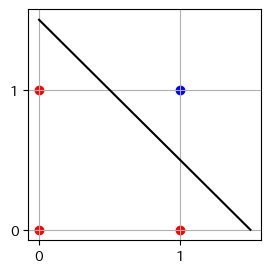

In [18]:
plt.figure(figsize=(3,3))
plt.scatter([0, 0, 1], [0, 1, 0], c='r')
plt.scatter(1, 1, c='b')
plt.plot([0, 1.5], [1.5, 0], c='k')
plt.xticks([0,1])
plt.yticks([0,1])
plt.grid()
plt.show()

### 演習2
2次元パルス関数$P_{0, 0.1; 0, 0.1}$を出力するニューラルネットnetを生成せよ。

### 演習3
$0 < x \le 1, 0 < y\le 1$で定められる領域において、
近似的に、$x^2 + y^2 < \frac 14$であればラベル1、
$x^2 + y^2 \ge \frac 14$であればラベル0を出力するニューラルネットnetを構成せよ。